In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("food_claims_2212.csv")
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [3]:
df.shape

(2000, 8)

In [4]:
df.nunique()

claim_id                2000
time_to_close            256
claim_amount            2000
amount_paid             1963
location                   4
individuals_on_claim      15
linked_cases               2
cause                      5
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [7]:
df.isnull().any()

claim_id                False
time_to_close           False
claim_amount            False
amount_paid              True
location                False
individuals_on_claim    False
linked_cases             True
cause                   False
dtype: bool

In [8]:
median=df['amount_paid'].median()
df['amount_paid'].fillna(median, inplace= True)

In [9]:
df.isnull().any()

claim_id                False
time_to_close           False
claim_amount            False
amount_paid             False
location                False
individuals_on_claim    False
linked_cases             True
cause                   False
dtype: bool

In [10]:
df['linked_cases'].fillna('False', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [12]:
(df['time_to_close']<0).sum()

0

In [13]:
df["claim_amount"]=df["claim_amount"].str.extract(r'(\d+.\d+)').astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 125.1+ KB


In [15]:
df["claim_amount"].round(decimals=2)

0       74474.55
1       52137.83
2       24447.20
3       29006.28
4       19520.60
          ...   
1995    28982.30
1996     5188.44
1997    11975.85
1998    23516.28
1999     8051.40
Name: claim_amount, Length: 2000, dtype: float64

In [16]:
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable


In [17]:
df['cause'].value_counts()

meat          943
unknown       713
vegetable     314
VEGETABLES     16
 Meat          14
Name: cause, dtype: int64

In [18]:
df=df.replace({'cause':{' Meat':'meat','VEGETABLES':'vegetable'}})

In [19]:
df['cause'].value_counts()

meat         957
unknown      713
vegetable    330
Name: cause, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 125.1+ KB


In [21]:
df.nunique()

claim_id                2000
time_to_close            256
claim_amount            2000
amount_paid             1964
location                   4
individuals_on_claim      15
linked_cases               3
cause                      3
dtype: int64

In [22]:
df['linked_cases'].value_counts()

False    1493
True      481
False      26
Name: linked_cases, dtype: int64

In [23]:
claim_number=df.groupby('location').claim_id.sum()
print(claim_number)

location
FORTALEZA    319903
NATAL        277700
RECIFE       874321
SAO LUIS     529076
Name: claim_id, dtype: int64


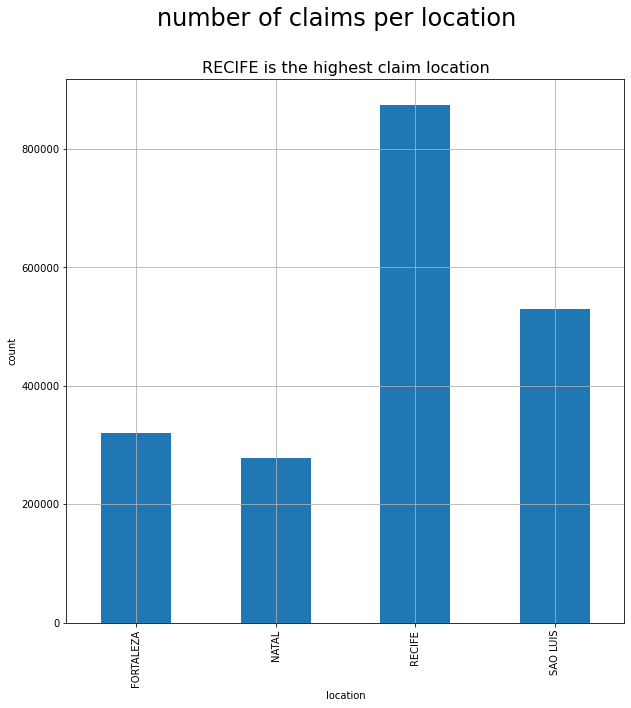

In [24]:
claim_number.plot(kind='bar', xlabel='location', ylabel='count', figsize=(10,10))
plt.title('RECIFE is the highest claim location',fontsize=16)
plt.suptitle('number of claims per location', fontsize=24)
plt.grid()
plt.savefig("Count_different_claims_location.png")

In [25]:
df['time_to_close'].max()

518

In [26]:
df['time_to_close'].min()

76

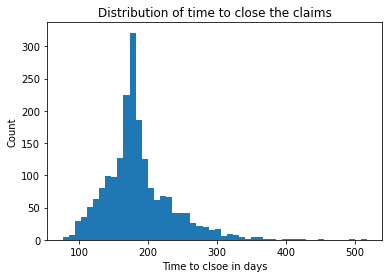

In [27]:
plt.hist(df['time_to_close'], bins=50)
plt.title('Distribution of time to close the claims')
plt.xlabel('Time to clsoe in days')
plt.ylabel('Count')
plt.savefig('Distribution of time to close the claims.png')
plt.show()

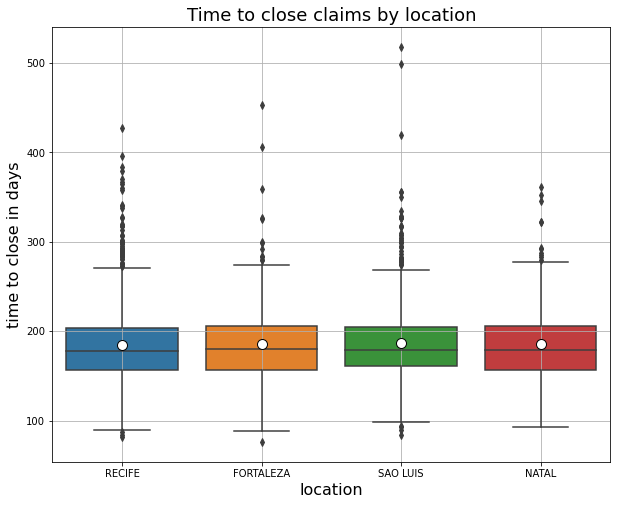

In [63]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['location'],y= df['time_to_close'], showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white",
                      "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Time to close claims by location',size=18)
plt.xlabel('location', size=16)
plt.ylabel('time to close in days', size=16)
plt.grid(zorder=2)
plt.savefig("Time to close claims by location.png")